In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

# library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# These are the available R packages in our Scripts environment:
# paste0(installed.packages()[,"Package"], "-", installed.packages()[,"Version"])
library(tidyverse)
library(lubridate)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(utils)
library(maps)
library(sf)
library(ggrepel)
library(readr)
library(stringr)
library(egg)
library(compare)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1


Attaching package: ‘compare’


The following object is masked from ‘package:base’:

    isTRUE




In [3]:
# functions
fig <- function(width, height){
    options(repr.plot.width = width, repr.plot.height = height)
}


# Bellabeat study case

<a id="0"></a> <br>
**Content**   
**[Background - Antecedentes](#1)**  
**[Prepration / Preparación](#20)**  
**[+ Data transformation / Transformación de datos](#21)**    
**[Analysis / Analisis](#30)**  
**[Conclusions / Conclusiones](#70)**  
**[Suggestions / Sugerencias](#80)**  
**[Anexxes - Anexos](#90)**  
**[+ Data check & cleansing / Revisión y limpieza de datos](#91)**  


<a id="1"></a> <br>
## Background / Antecedentes

##### English
Bellabeat is a high-tech company, which manufactures devices aimed towards women's health. They are in the competitive and growing business of smart devices, and they need to understand the use of these devices, and gain insights into how customers use smart devices "not provided by Bellabeat", and pose it as three questions to answer:  
* What trends exist in the use of smart devices?  
* How can these trends be applied to Bellabeat customers?  
+ How can these trends influence BellabeaT's marketing strategies?  

Its products are:  
* Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.  

##### Español
Bellabeat es una empresa de alta tecnología, que manufactura dispositivos orientados a la salud de las mujeres. Están en el competitivo y creciente negocio de los dispositivos inteligentes, y requieren entender el uso de estos equipos, y obtener perspectivas de como los clientes usan dispositivos inteligentes "no provistos por Bellabeat", y lo plantean como tres preguntas a responder:
* Qué tendencias existen en el uso de dispositivos inteligentes?
* Cómo estas estas tendencias se pueden aplicar a los clientes de Bellabeat?
+ Cómo estas tendencias pueden influir en las estrategias de maketing de BellabeaT?

Sus productos son:
* Bellabeat App: la aplicación Bellabeat brinda a los usuarias datos de salud relacionados con su actividad, sueño, estrés, ciclo menstrual y hábitos de meditación. Estos datos pueden ayudar a los usuarios a comprender mejor sus hábitos actuales y tomar decisiones saludables. La aplicación Bellabeat se conecta a su línea de productos de bienestar inteligentes.
* Leaf: el rastreador de bienestar clásico de Bellabeat se puede usar como pulsera, collar o clip. El rastreador Leaf se conecta a la aplicación Bellabeat para rastrear la actividad, el sueño y el estrés.
* Time: este reloj de bienestar combina el aspecto atemporal de un reloj clásico con tecnología inteligente para realizar un seguimiento de la actividad, el sueño y el estrés del usuario. El reloj Time se conecta a la aplicación Bellabeat para brindarle información sobre su bienestar diario.
* Spring: esta es una botella de agua que realiza un seguimiento de la ingesta diaria de agua utilizando tecnología inteligente para garantizar que esté adecuadamente hidratado durante todo el día. La botella Spring se conecta a la aplicación Bellabeat para realizar un seguimiento de sus niveles de hidratación.
* Membresía de Bellabeat: Bellabeat también ofrece un programa de membresía basado en suscripción para los usuarios. La membresía brinda a los usuarios acceso las 24 horas del día, los 7 días de la semana, a orientación totalmente personalizada sobre nutrición, actividad, sueño, salud y belleza y atención plena en función de su estilo de vida y objetivos.  


## Data source / Origen de datos
[Back to top](#0)
##### English
Data is provided by Mobius (https://www.kaggle.com/arashnic/fitbit), under license (https://creativecommons.org/publicdomain/zero/1.0/). The original data was generated in a study conducted in 2016 (https://zenodo.org/record/53894#.YhoxOuiZPcd).  

##### Español
Los datos son provistos por Mobius (https://www.kaggle.com/arashnic/fitbit), con licencia (https://creativecommons.org/publicdomain/zero/1.0/).  Los datos originales fueron generados en un estudio realizado en 2016 (https://zenodo.org/record/53894#.YhoxOuiZPcd).

## Raw data revision / Revisión de datos originales
[Back to top](#0)

##### English
The data is grouped in 18 files with records in different time bases (days, hours, minutes, seconds). As a first step we will analyze the consistency of the data. We know, from the original document, that the study was carried out on 30 individuals, in a period of time between 2016-03-12 and 2016-05-12, and that there are variations in the data obtained due to differences in the types of devices used and individual preferences or tracking behaviors.  

We upload the files and discard uploading 4 files that correspond to data in "Wide" format because they are also in "Narrow" format.  

##### Español
Los datos vienen agrupados en 18 archivos con registros en diferentes bases de tiempo (días, horas, minutos, segundos). Como primer paso analizaremos la consistencia de los datos. Sabemos, por el documento original, que el estudio se realizó sobre 30 individuos, en un período de tiempo comprendido entre 2016-03-12 y 2016-05-12, y que en los datos obtenidos hay variaciones debido a diferencias en los tipos de dispositivos utilizados y las preferencias o comportamientos de seguimiento individuales.  

Cargamos los archivos y descartamos subir 4 archivos que corresponden a datos en formato "Wide" porque se encuentran también en formato "Narrow".  


In [4]:
# data load / carga de datos

# daily data / datos diarios
day_activity <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
day_calories <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
day_intensity <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
day_steps <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
day_sleep <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
day_weight <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# data by hours / datos por horas
hour_calories <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hour_intensity <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hour_steps <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

# data by minutes / datos por minutos
min_calories <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
min_intensity <-read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
min_steps <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
min_met <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

# data by seconds / datos por segundos
sec_heartrate <- read_csv("../input/fitbitbellabeat/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")


Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

##### English
The data review and cleaning process can be found in the Annexes section, for the convenience of reading this document.

From the data cleanse:  
* The daily and hourly data are the summary of data per minute, so we will work with the basic data per minute.  
* Sleep information: 24 people (73%) have sleep records, and 13 people (39%) have records for more than half of the program.  
* Weight information: only 8 people (24%) checked their weight and only 2 of them (6%) for more than half of the program.  
* No data lost.  

##### Español
El preceso de revisión y limpieza de datos se encuentra en la sección de Anexos, para comodidad de lectura de este documento.  

Desde la limpieza de datos:  
* Los datos diarios y por hora, son el resumen de datos por minutos, por lo que trabajaremos con los datos básicos por minuto.
* Información de sueño: 24 personas (73%) tienen registros de sueño, y 13 personas (39%) tiene registros por más de la mitad del programa.
* Información de peso: sólo 8 personas (24%) realizaron control de su peso y unicamente 2 de ellos (6%) por más de la mitad del programa.
* No hay datos perdidos.

<a id="20"></a> <br>
## Preparation / Preparación
[Back to top](#0)  

<a id="21"></a> <br>
### Data transformation / Transformación de los datos
[Back to top](#0)  

##### English
Since the date data comes in "character" format, we'll add the date, hour, min, and sec in a more appropriate format for processing.  

##### Español
Como los datos de fechas vienen en formato "character", agregaremos la fecha, hora, min y sec en un formato más apropiado para procesar.

In [5]:
# adding date, hour, min, sec in datetime format
format <- "%m/%d/%Y %I:%M:%S %p"
print("min_caloriest -----------------")
min_caloriest <- mutate(min_calories, 
                         datetime= strptime(ActivityMinute,format),
                         calendar= date(datetime), 
                         hr= hour(datetime), 
                         mn= minute(datetime), 
                         sc= second(datetime))
head(min_caloriest, n=3)
print("min_intensityt -----------------")
min_intensityt <- mutate(min_intensity, 
                         datetime= strptime(ActivityMinute,format),
                         calendar= date(datetime), 
                         hr= hour(datetime), 
                         mn= minute(datetime), 
                         sc= second(datetime))
head(min_intensityt, n=3)
print("min_stepst -----------------")
min_stepst <- mutate(min_steps, 
                         datetime= strptime(ActivityMinute,format),
                         calendar= date(datetime), 
                         hr= hour(datetime), 
                         mn= minute(datetime), 
                         sc= second(datetime))
head(min_stepst, n=3)
print("min_mett -----------------")
min_mett <- mutate(min_met, 
                         datetime= strptime(ActivityMinute,format),
                         calendar= date(datetime), 
                         hr= hour(datetime), 
                         mn= minute(datetime), 
                         sc= second(datetime))
head(min_mett, n=3)

print("day_sleept -----------------")
day_sleept <- mutate(day_sleep, 
                    datetime= strptime(SleepDay,format),
                    calendar= date(datetime), 
                    hr= hour(datetime), 
                    mn= minute(datetime), 
                    sc= second(datetime))
head(day_sleept, n= 3)
print("day_weight -----------------")
day_weightt <- mutate(day_weight, 
                     datetime= strptime(Date,format),
                     calendar= date(datetime), 
                     hr= hour(datetime), 
                     mn= minute(datetime), 
                     sc= second(datetime))
head(day_weightt, n= 3)
print("sec_heartratet -----------------")
sec_heartratet <- mutate(sec_heartrate, 
                         datetime= strptime(Time,format),
                         calendar= date(datetime), 
                         hr= hour(datetime), 
                         mn= minute(datetime), 
                         sc= second(datetime))
head(sec_heartratet, n=3)

[1] "min_caloriest -----------------"


Id,ActivityMinute,Calories,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0.7865,2016-04-12 00:00:00,2016-04-12,0,0,0
1503960366,4/12/2016 12:01:00 AM,0.7865,2016-04-12 00:01:00,2016-04-12,0,1,0
1503960366,4/12/2016 12:02:00 AM,0.7865,2016-04-12 00:02:00,2016-04-12,0,2,0


[1] "min_intensityt -----------------"


Id,ActivityMinute,Intensity,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0,2016-04-12 00:00:00,2016-04-12,0,0,0
1503960366,4/12/2016 12:01:00 AM,0,2016-04-12 00:01:00,2016-04-12,0,1,0
1503960366,4/12/2016 12:02:00 AM,0,2016-04-12 00:02:00,2016-04-12,0,2,0


[1] "min_stepst -----------------"


Id,ActivityMinute,Steps,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0,2016-04-12 00:00:00,2016-04-12,0,0,0
1503960366,4/12/2016 12:01:00 AM,0,2016-04-12 00:01:00,2016-04-12,0,1,0
1503960366,4/12/2016 12:02:00 AM,0,2016-04-12 00:02:00,2016-04-12,0,2,0


[1] "min_mett -----------------"


Id,ActivityMinute,METs,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10,2016-04-12 00:00:00,2016-04-12,0,0,0
1503960366,4/12/2016 12:01:00 AM,10,2016-04-12 00:01:00,2016-04-12,0,1,0
1503960366,4/12/2016 12:02:00 AM,10,2016-04-12 00:02:00,2016-04-12,0,2,0


[1] "day_sleept -----------------"


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,2016-04-12,0,0,0
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,2016-04-13,0,0,0
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,2016-04-15,0,0,0


[1] "day_weight -----------------"


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02 23:59:59,2016-05-02,23,59,59
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03 23:59:59,2016-05-03,23,59,59
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13 01:08:52,2016-04-13,1,8,52


[1] "sec_heartratet -----------------"


Id,Time,Value,datetime,calendar,hr,mn,sc
<dbl>,<chr>,<dbl>,<dttm>,<date>,<int>,<int>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97,2016-04-12 07:21:00,2016-04-12,7,21,0
2022484408,4/12/2016 7:21:05 AM,102,2016-04-12 07:21:05,2016-04-12,7,21,5
2022484408,4/12/2016 7:21:10 AM,105,2016-04-12 07:21:10,2016-04-12,7,21,10


##### English
We will join the min_calories and min_steps lists to the min_intensity list, and create a data frame with the main variables to work with.  

##### Español
Uniremos las listas de min_calories y min_steps a la de min_intensity, y creamos un data frame con las principales variables para trabajar.

In [6]:
# Joinning
minute_data <- left_join(min_intensityt, min_caloriest)
minute_data <- left_join(minute_data, min_stepst)

Joining, by = c("Id", "ActivityMinute", "datetime", "calendar", "hr", "mn", "sc")

Joining, by = c("Id", "ActivityMinute", "datetime", "calendar", "hr", "mn", "sc")



In [7]:
# data frame to work with
minute_data <- select(minute_data,Id,calendar,hr,mn,sc,Intensity,Calories,Steps)

<a id="30"></a><br>
## Analysis / Analisis
[Back to top](#0)

##### Enfglish
We take a first look at the data to look for relationships.  

##### Español
Echamos un primer vistazo a los datos para buscar relaciones.  


In [8]:
# overview / vista general
summar0 <- minute_data %>%
group_by(Id) %>%
summarise(
date_ini= min(calendar),
date_end= max(calendar),
days_span= as.integer(date_end - date_ini)+1,
intensity_avg= round(mean(Intensity),3),
intensity_var= round(var(Intensity),3),
calories_total= round(sum(Calories),0),
steps_total= round(sum(Steps),0),
calories_avg= round(calories_total/days_span,1),
steps_avg= round(steps_total/days_span,0)
)
arrange(summar0,days_span)

Id,date_ini,date_end,days_span,intensity_avg,intensity_var,calories_total,steps_total,calories_avg,steps_avg
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4057192912,2016-04-12,2016-04-15,4,0.082,0.081,7851,15305,1962.8,3826
2347167796,2016-04-12,2016-04-29,18,0.242,0.272,36730,171337,2040.6,9519
8253242879,2016-04-12,2016-04-29,18,0.152,0.240,33910,122838,1883.9,6824
3372868164,2016-04-12,2016-05-01,20,0.256,0.235,38601,137057,1930.0,6853
6775888955,2016-04-12,2016-05-07,26,0.073,0.136,55412,65371,2131.2,2514
7007744171,2016-04-12,2016-05-07,26,0.293,0.365,66100,294409,2542.3,11323
6117666160,2016-04-12,2016-05-09,28,0.209,0.175,60623,185673,2165.1,6631
6290855005,2016-04-12,2016-05-09,28,0.177,0.163,75321,163678,2690.0,5846
8792009665,2016-04-12,2016-05-09,28,0.074,0.078,56864,53750,2030.9,1920


##### English
When analyzing the distribution of program information, it is obtained that:
* 63.6% of the people completed the program completely
* 87.8% completed more than 75% of the program
* 3.0% completed less than 50% of the monitoring program  

##### Español
Al analizar la distribución de información del programa, se obtiene que:
* El 63.6% de las persona terminaron el programa en forma completa
* El 87.8% completó más del 75% del programa
* El 3.0% completó menos del 50% del programa de monitoreo

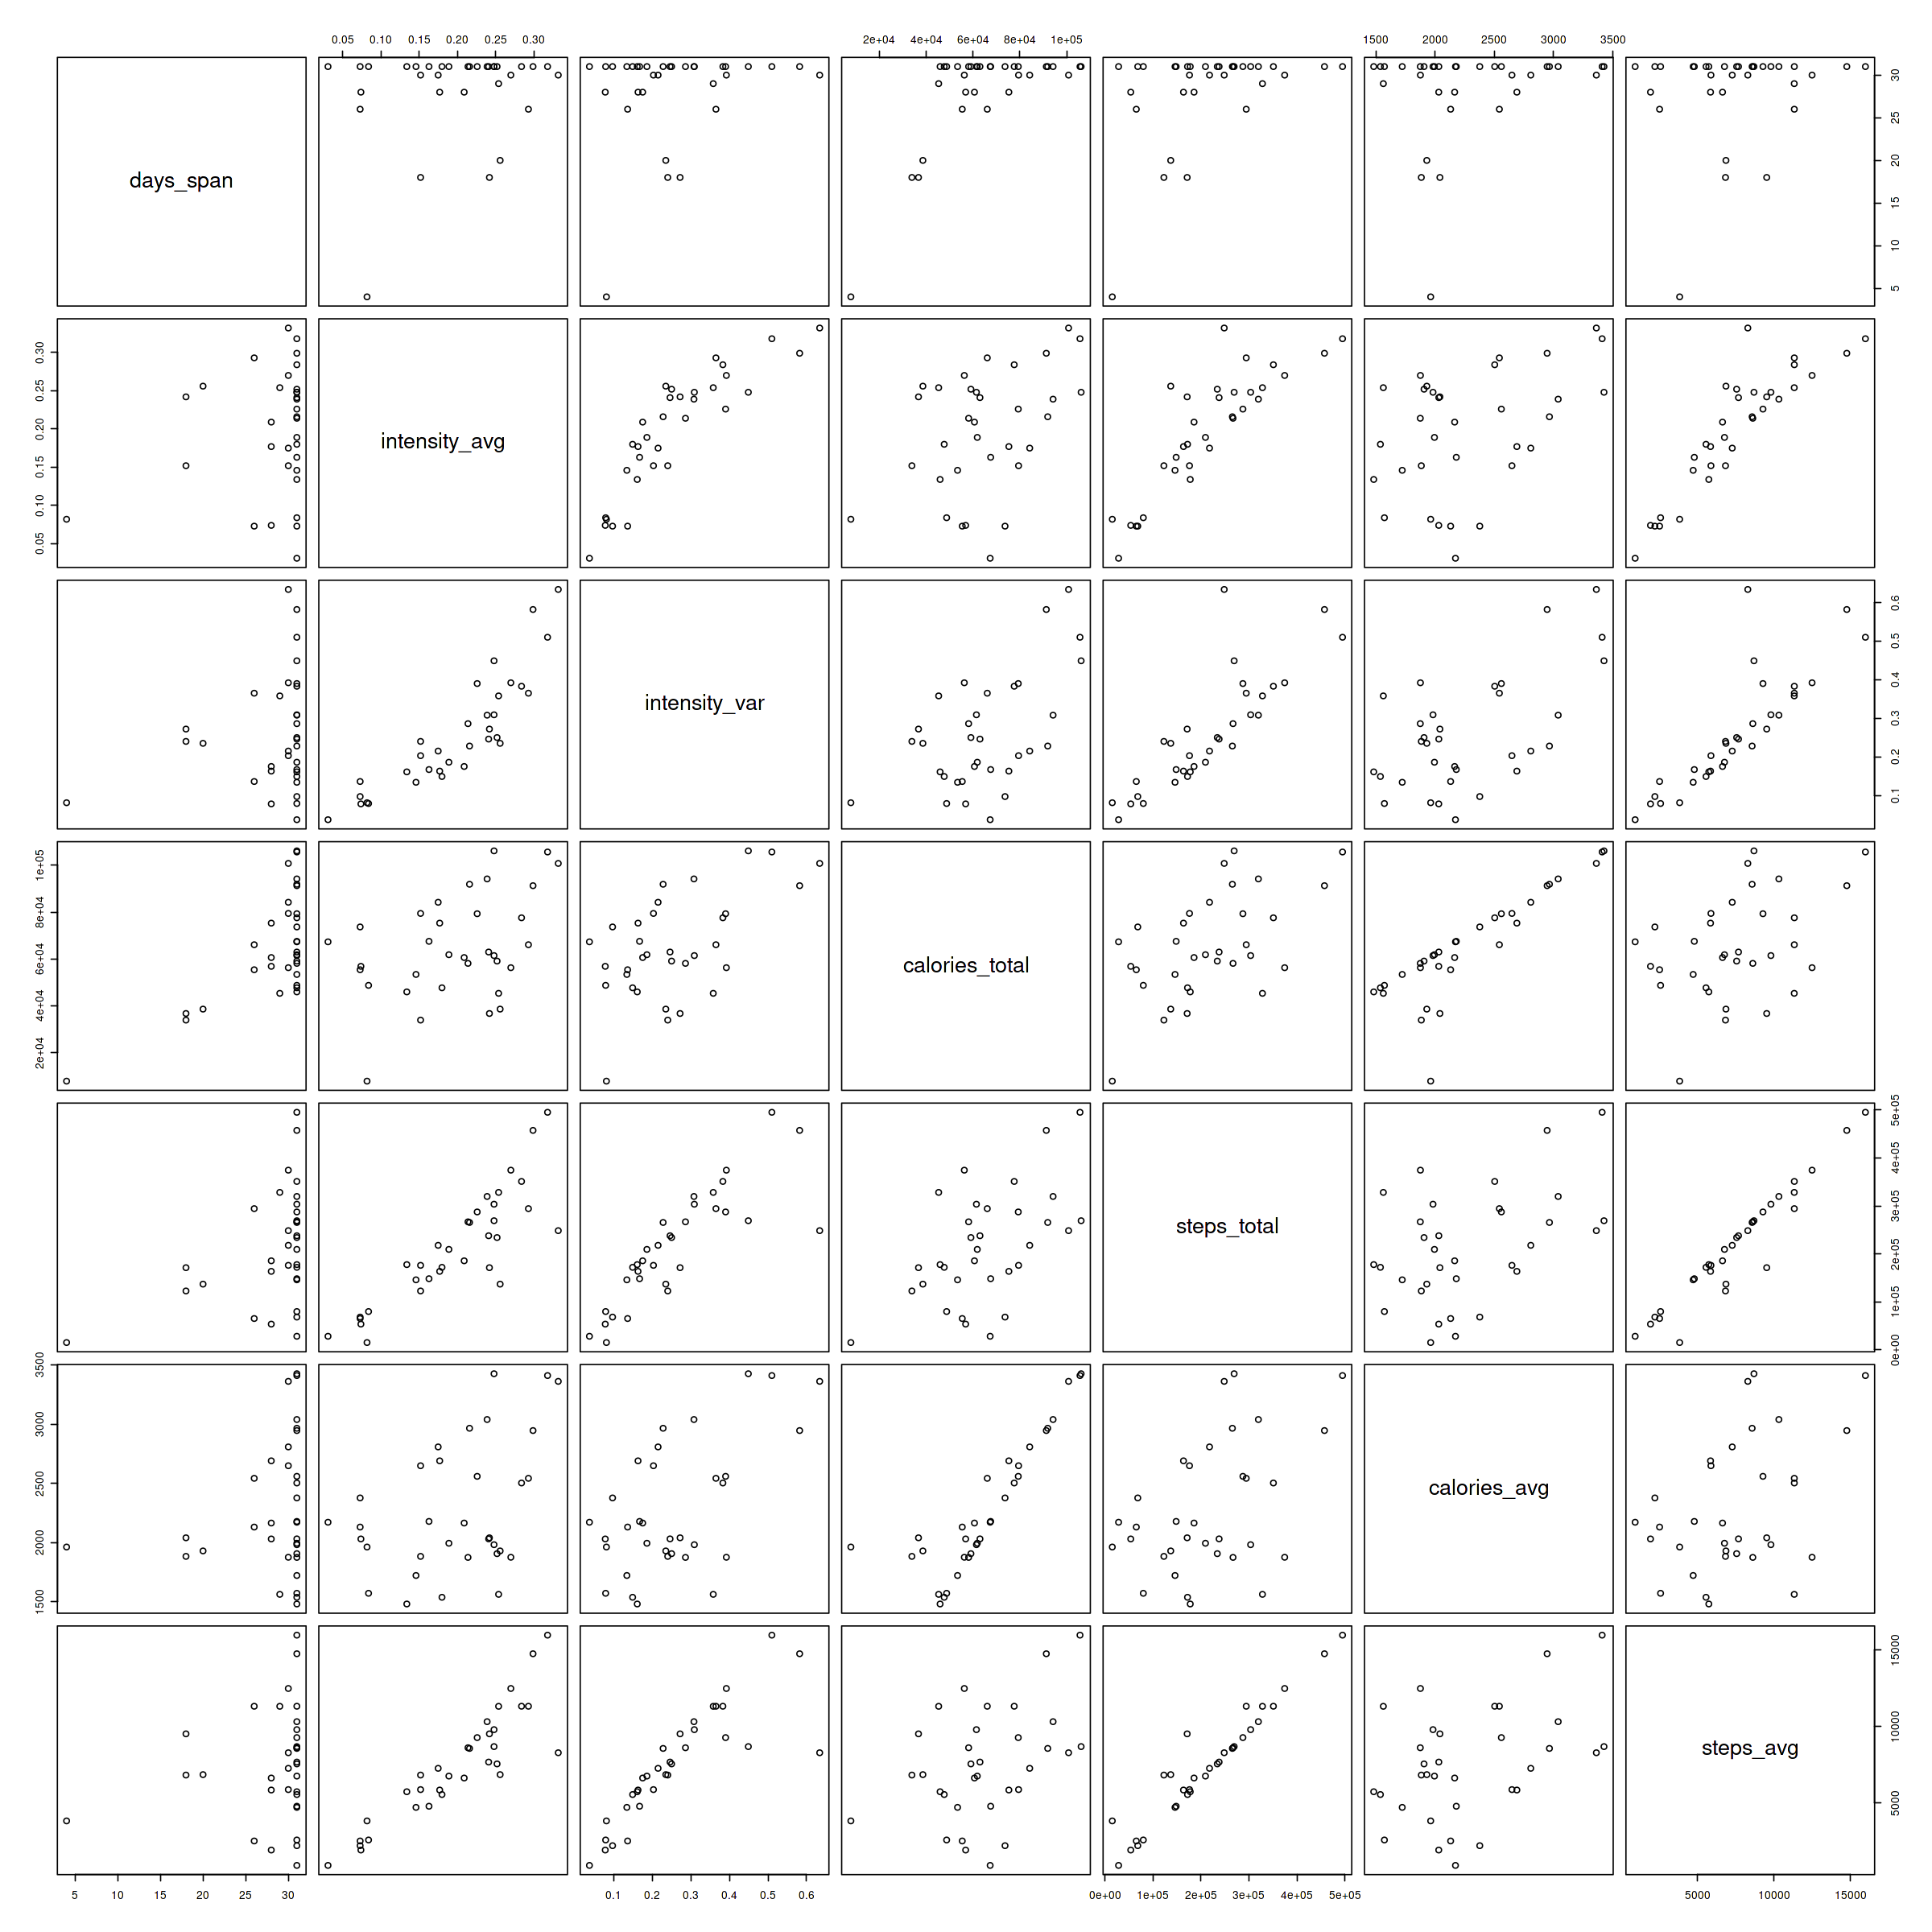

In [9]:
fig(20,20)
plot(select(summar0, days_span,
           intensity_avg, intensity_var, calories_total,
           steps_total,calories_avg,steps_avg))

##### English
From these graphs we can say:  
* There would be some level of correlation between the steps and average intensity, that is to say that the people who take the most steps would do so by jogging.  
> **Question 1: Can we verify that the people who take the most steps is because they practice jogging?**  
* Calories burned by intense activity or increased number of steps does not seem to have a very high correlation.  
  > **Question 2: How is the intensity/calorie ratio?**  
* There is a curious relationship, and that is that as the average intensity increases, its variability also increases, and the same relationship appears with the steps.  
> **Question 3: Why does the variability increase with increasing intensity, or the average number of steps?**  
> **Question 4: Could you indicate differentiated behavior for people of high intensity?**  

##### Español
De estos gráficos podemos decir:
* Existiría algún nivel de correlación entre los pasos y intensidad media, es dcir que la personas que más pasos dan lo harían por trotar.  
> **Pregunta1: Podemos verificar la que las personas que más pasos dan es porque practican trote?**  
* Las calorías que se queman por la actividad intensa o mayor número de pasos no parece tener una correlación muy alta.  
 > **Pregunta2: Cómo es la relación intensidad/calorías?**  
* Existe una relación curiosa, y es que al aumentar la intensidad media, su variabilidad también aumenta, y la misma relación aparece con los pasos.  
> **Pregunta3: Por qué la variabilidad aumenta al aumentar la intensidad, o el promedio de pasos?**  
> **Pregunta4: Podría indicar comportamiento diferenciado para personas de alta intensidad?**  

In [10]:
# Sleep data
arrange(day_sleept %>%
group_by(Id) %>%
summarise(
n= n(),
records= sum(TotalSleepRecords),
sleep_min= round(mean(TotalMinutesAsleep),0),
onbed_min= round(mean(TotalTimeInBed),0),
min_date= min(calendar),
max_date= max(calendar),
days_span= as.integer(max_date-min_date)+1
),n)

Id,n,records,sleep_min,onbed_min,min_date,max_date,days_span
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<date>,<date>,<dbl>
2320127002,1,1,61,69,2016-04-23,2016-04-23,1
7007744171,2,2,68,72,2016-04-16,2016-05-01,16
1844505072,3,3,652,961,2016-04-15,2016-05-01,17
6775888955,3,3,350,369,2016-04-13,2016-04-15,3
8053475328,3,3,297,302,2016-04-20,2016-05-07,18
1644430081,4,4,294,346,2016-04-29,2016-05-08,10
1927972279,5,8,417,438,2016-04-12,2016-04-28,17
4558609924,5,5,128,140,2016-04-21,2016-05-08,18
4020332650,8,8,349,380,2016-04-12,2016-05-10,29


##### English
24 people (73%) have sleep logs, and 13 people (39%) have logs for more than half of the program.
Since there is quite a lot of sleep data, later on, we will be able to analyze it in conjunction with the level of activity.  

##### Español
24 personas (73%) tienen registros de sueño, y 13 personas (39%) tiene registros por más de la mitad del programa.  
Como hay bastantes datos de sueño, más adelante, podremos analizarlo en conjunto con el nivel de actividad.

In [11]:
# heart rate check-out
arrange(sec_heartratet %>%
group_by(Id) %>%
summarise(
n= n(),
min= min(Value),
max= max(Value),
avg= mean(Value),
min_date= min(calendar),
max_date= max(calendar),
days_span= as.integer(max_date-min_date)+1
), days_span)

Id,n,min,max,avg,min_date,max_date,days_span
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<date>,<date>,<dbl>
2347167796,152683,49,195,76.72279,2016-04-12,2016-04-29,18
2026352035,2490,63,125,93.77631,2016-04-17,2016-05-09,23
8792009665,122841,43,158,72.48748,2016-04-12,2016-05-04,23
6117666160,158899,52,189,83.74989,2016-04-15,2016-05-09,25
6775888955,32771,55,177,92.02963,2016-04-13,2016-05-07,25
7007744171,133592,54,166,91.12379,2016-04-12,2016-05-06,25
4388161847,249748,39,180,66.13300,2016-04-13,2016-05-12,30
5577150313,248560,36,174,69.56452,2016-04-12,2016-05-11,30
2022484408,154104,38,203,80.23686,2016-04-12,2016-05-12,31


##### English
14 people (42%) of the people had a heart rate check.

##### Español
14 personas (42%) de las personas realizaron un control de ritmo cardíaco.

In [12]:
# Weight data
arrange(day_weightt %>%
group_by(Id) %>%
summarise(
n= n(),
min= min(WeightKg),
max= max(WeightKg),
min_date= min(calendar),
max_date= max(calendar),
days_span= as.integer(max_date-min_date)+1
), n)


Id,n,min,max,min_date,max_date,days_span
<dbl>,<int>,<dbl>,<dbl>,<date>,<date>,<dbl>
1927972279,1,133.5,133.5,2016-04-13,2016-04-13,1
5577150313,1,90.7,90.7,2016-04-17,2016-04-17,1
1503960366,2,52.6,52.6,2016-05-02,2016-05-03,2
2873212765,2,56.7,57.3,2016-04-21,2016-05-12,22
4319703577,2,72.3,72.4,2016-04-17,2016-05-04,18
4558609924,5,69.1,70.3,2016-04-18,2016-05-09,22
8877689391,24,84.0,85.8,2016-04-12,2016-05-12,31
6962181067,30,61.0,62.5,2016-04-12,2016-05-12,31


##### English
Only 8 people (24%) controlled their weight and only 2 of them for the duration of the program.  

##### Español
Sólo 8 personas (24%) realizaron control de su peso y unicamente 2 de ellos por la duración del programa.

### Group analysis / Analisis de grupos
##### English
From the variance data of intensity and steps (question 4), it seems to us that there could be groups of people with different behaviors for the development of physical activity. We'll try to figure out a way to identify them. For that we will analyze people who have had many registrations during the program, and I decided to use the 80% with more information, that is, people who were in the program for more than 26 days.  

##### Español
De los datos de varianza de intensidad y pasos (pregunta4), nos parece que podrían existir grupos de personas con diferentes comportamientos para el desarrollo de actividad física. Intentaremos averiguar una forma identificarlos. Para eso analizaremos personas que hayan tenido muchos registros durante el programa, y decidí usar el 80% con más información, es decir personas que estuvieron en el programa más de 26 días

In [13]:
# Id selection with days_span >26
id_list <- select(filter(summar0, days_span > 26),Id)  

# new df with the selected Id
selec_id <- left_join(id_list, minute_data, by= c("Id"="Id"))
head(selec_id)

Id,calendar,hr,mn,sc,Intensity,Calories,Steps
<dbl>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,0,0,0,0,0.7865,0
1503960366,2016-04-12,0,1,0,0,0.7865,0
1503960366,2016-04-12,0,2,0,0,0.7865,0
1503960366,2016-04-12,0,3,0,0,0.7865,0
1503960366,2016-04-12,0,4,0,0,0.7865,0
1503960366,2016-04-12,0,5,0,0,0.9438,0


In [14]:
# OCULTO
a <- selec_id$Id == 1624580081
b <- selec_id$calendar == "2016-04-12"
c <- selec_id$hr >= 6 & selec_id$hr <= 7

head(selec_id[which(a & b & c),])

Id,calendar,hr,mn,sc,Intensity,Calories,Steps
<dbl>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1624580081,2016-04-12,6,0,0,0,0.831,0
1624580081,2016-04-12,6,1,0,0,0.831,0
1624580081,2016-04-12,6,2,0,0,0.831,0
1624580081,2016-04-12,6,3,0,0,0.831,0
1624580081,2016-04-12,6,4,0,0,0.831,0
1624580081,2016-04-12,6,5,0,0,0.831,0


In [15]:
# grouped by ID/Intensity to reduce the number of registers
selec_group <- selec_id %>%
group_by(Id,Intensity) %>%
summarise(
n= n(),
s_step= sum(Steps),
s_calor= round(sum(Calories),0),
speed_km_hr= round(mean(Steps)/1.42*60/1000,1)
)

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



In [16]:
head(selec_group)

Id,Intensity,n,s_step,s_calor,speed_km_hr
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1503960366,0,34420,0,29144,0.0
1503960366,1,6806,200075,17999,1.2
1503960366,2,594,39165,2163,2.8
1503960366,3,1200,135306,6984,4.8
1624580081,0,38961,300,32376,0.0
1624580081,1,4750,124084,11160,1.1


In [17]:
# Correlation check
print("Correlation coef Steps vs Calories")
round(cor(selec_group$s_step, selec_group$s_calor),3)
print("Correlation coef Steps vs speed_km_hr")
round(cor(selec_group$s_step, selec_group$speed_km_hr),3)
print("Correlation coef speed_km_hr vs Calories")
round(cor(selec_group$speed_km_hr, selec_group$s_calor),3)


[1] "Correlation coef Steps vs Calories"


[1] 0.044

[1] "Correlation coef Steps vs speed_km_hr"


[1] 0.101

[1] "Correlation coef speed_km_hr vs Calories"


[1] -0.726

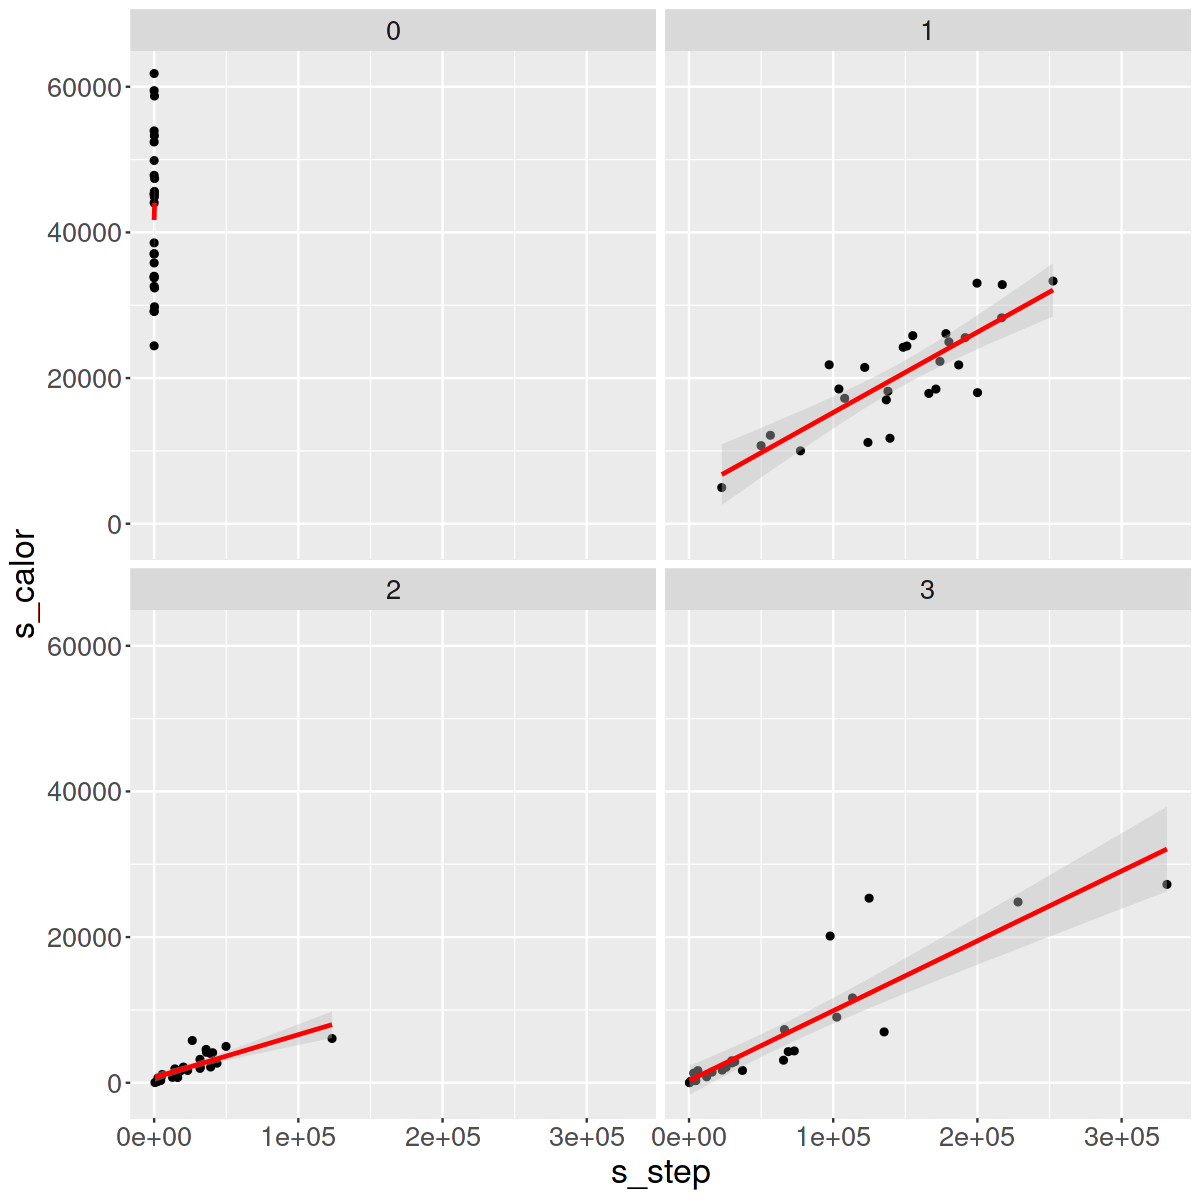

In [18]:
fig(10,10)
# steps vs calories fact by intensity
ggplot(data=selec_group, aes(x= s_step, y= s_calor))+
geom_point()+
geom_smooth(formula= "y ~ x",method=lm, color="red", fill="grey", se= TRUE)+
theme(text = element_text(size=20))+
facet_wrap(~Intensity)

##### English
There are important differences, apparently there is a group of records that has values of calories and not of steps or intensity (Intensity=0, in the first graph).  
This group of measurements would indicate that the device did not record steps (in the next step, we verify that 20 users record energy expenditure (calories) but do not record steps), which leads us to ask:  
**Did the device fail a few times and stop recording steps, or was this data lost during the original data collection?**  

Regarding the other three graphs, we see that the expected correlation between calories and steps exists. But, there is something curious, and that I expected that at a higher level of intensity, the consumption of calories would be greater, but this does not happen. I can't answer this question.
> **Why doesn't power consumption increase with intensity level?**
I can only speculate that at the time of the study, the devices, or the algorithms, were not yet as precise, and caused distortions in the information.  

##### Español
Hay diferencias importantes, al parecer hay un grupo de registros que tiene valores de calorias y no de pasos ni intensidad (Intensity=0, en el primer gráfico).  
Este grupo de mediciones nos indicaría, que el dispositivo no registró pasos (en el siguiente paso, verificamos que 20 usuarios registran gasto de energía (calorías) pero no registran pasos), lo que nos lleva a preguntarnos:  
**Falló el dipositivo en algunas ocasiones y dejó de registrar los pasos, o estos datos se perdieron durante las recopilación de datos originales?**  

Respecto a los otros tres gráficos, vemos que la correlación esperada entre calorías y pasos existe. Pero, hay algo curioso, y que esperaba que a un nivel mayor de intensidad, el consumo de calorías fuese mayor, pero esto no ocurre. No puedo responder esta duda.  
> **Por qué el consumo de energía no aumenta con el nivel de intensidad?**  
Sólo puedo especular, que en la época del estudio, los dispositivos, o los algoritmos, no eran tan precisos todavía, y provocaban distorsiones en la información.



In [19]:
# group Intensity=0 identification
a <- selec_group$Intensity == 0
b <- selec_group$s_calor > 0
c <- selec_group$s_step == 0
list1 <- which(a & b & c)

head(distinct(selec_group[list1,],Id))

Id
<dbl>
1503960366
1844505072
1927972279
2022484408
2026352035
2320127002


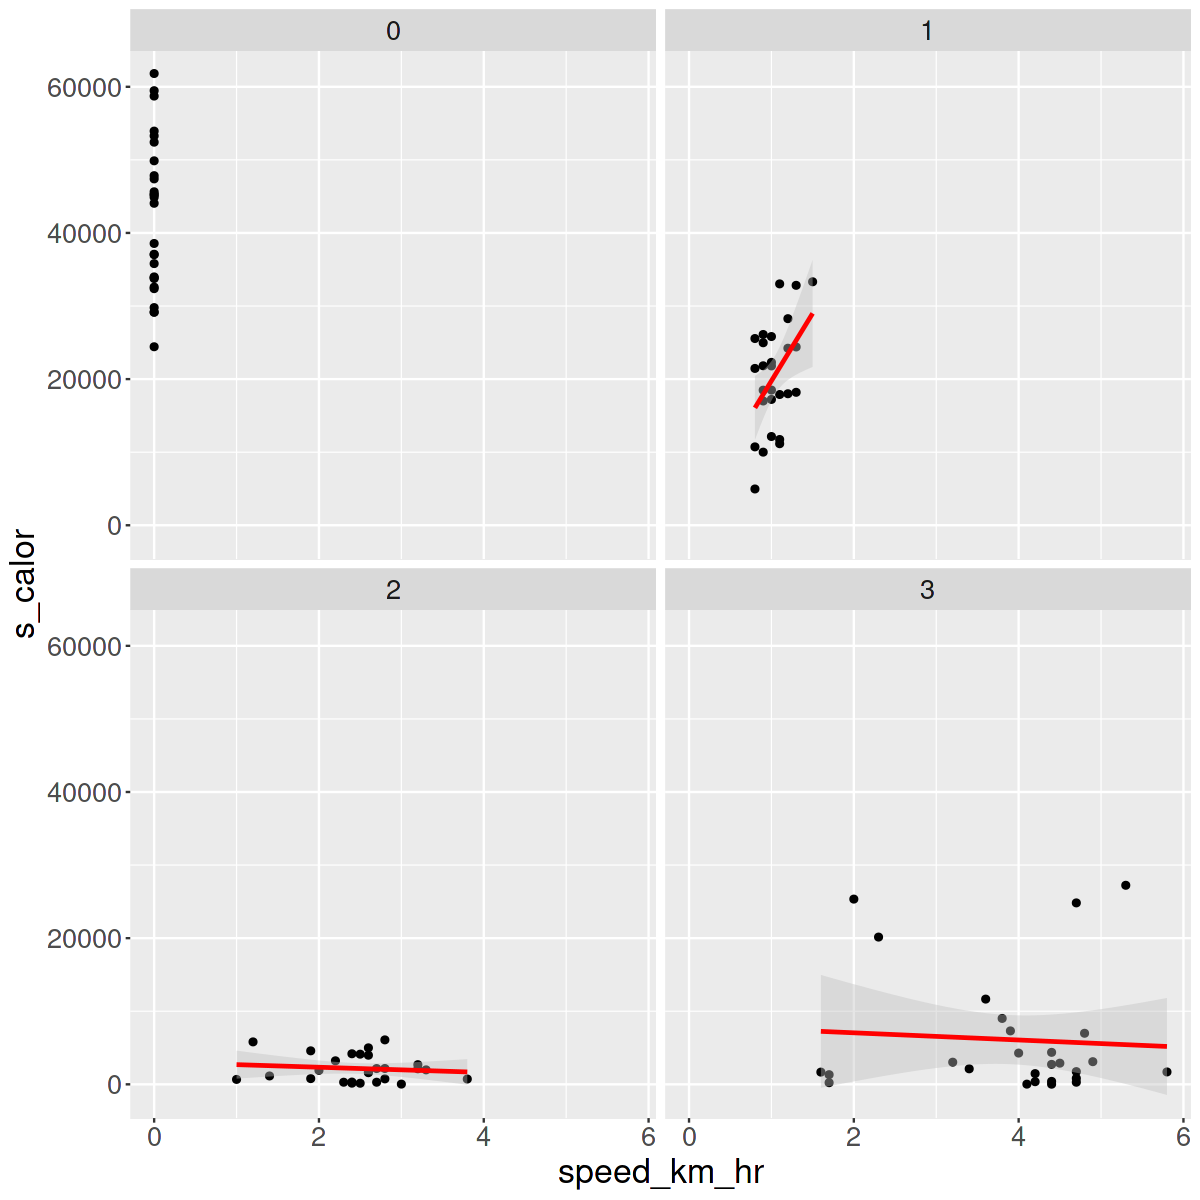

In [20]:
fig(10,10)
# speed (km/hr) vs calories fact by intensity
ggplot(data=selec_group, aes(x= speed_km_hr, y= s_calor))+
geom_point()+
geom_smooth(formula= "y ~ x",method=lm, color="red", fill="grey", se= TRUE)+
theme(text= element_text(size=20))+
facet_wrap(~Intensity)

##### English
Stranger still, here we see that in the cases of intensity 2 and 3, calories are not related to speed, and this is not physically possible, since calories measure the energy consumed, and energy is proportional to the work done. and for higher speed, more energy is required.  
This leads me to assume that the devices used to measure energy (calories) used algorithms related to the number of steps, and not the speed of those steps, and therefore cannot adequately measure energy use.  

##### Español
Más extraño aún, acá vemos que en lo casos de intensidad 2 y 3, las calorías no tienen relación con la velocidad, y esto no es físicamente posible, ya que las calorías miden la enrgía consumida, y la energía, es proporcional al trabajo realizado y para mayor velocidad, se requiere más energía.  
Esto me lleva a suponer que los dispositivos utilizados para medir la energía (calorías) usaban algoritmos relacionados con la cantidad de pasos, y no con la velocidad de esos pasos, y por eso no pueden medir adecuadamente el uso de energía.  

<a id="70"></a> <br>
## Conclusiones / Conclusiones
[Back to top](#0)  
##### English
In this case we find several interesting things, which can be useful to know to think about the development of Bellabeat and its products.  
Some findings about the group of people studied:  
* 63.6% of the people completed the program completely, which would indicate interest on the part of the participants.  
* 87.8% completed more than 75% of the program, there is a low level of desertion in the process.  
* 3.0% completed less than 50% of the monitoring program.  
* 24 people (73%) have sleep records, and 13 people (39%) have records for more than half of the program.  
* 14 people (42%) of people had a heart rate check.  
* Only 8 people (24%) controlled their weight and only 2 of them for the duration of the program.  
* There is no correlation between Calories and Steps, and the correlation between speed (speed_km_hr) and Calories is not negligible, but negative, which is counterintuitive.  
* There is loss of information when the intensity was zero, and only calories were recorded.  
* The regressions between calories and steps, even when positive, are not as expected, since there is no correlation between the intensity of the activity and the calories expended.  
* The regression between Calories and speed show independence between the variables, which could indicate that the instruments to measure calories burned were not adequate, or the algorithms were not sufficiently developed to measure them correctly.  

##### Español
En este caso encontramos varias cosas interesantes, que pueden ser útiles de conocer para pensar en el desarrollo de Bellabeat y sus productos.  
Algunos hallazgos sobre el grupo de personas estudiadas:  
* El 63.6% de las persona terminaron el programa en forma completa, lo que nos indicaría interés por parte de los participantes.  
* El 87.8% completó más del 75% del programa, hay bajo nivel de deserción en el proceso.  
* El 3.0% completó menos del 50% del programa de monitoreo.  
* 24 personas (73%) tienen registros de sueño, y 13 personas (39%) tiene registros por más de la mitad del programa.  
* 14 personas (42%) de las personas realizaron un control de ritmo cardíaco.  
* Sólo 8 personas (24%) realizaron control de su peso y unicamente 2 de ellos por la duración del programa.  
* No hay correlación entre Calorias y Pasos, y la correlación entre velocidad (speed_km_hr) y Calorias no es despreciable, pero negativa, lo cual es contraintuitivo.  
* Hay pérdida de información cuando la intensidad era cero, y sólo se registró calorías.
* Las regresiones entre calorías y pasos, aún cuando son positivas, no son las esperadas, ya que no hay correlación entre la intensidad de la actividad y las calorías gastadas.
* La regresión entre Calorias y velocidad muestran independencia entre las variables, lo que podría indicar que los instrumentos para medir calorías quemadas, no eran los adecuados, o los algoritmos no lo suficientemente desarrollados para medir correctamente.  

<a id="80"></a> <br>
## Suggestions / Sugerencias
[Back to top](#0)
##### English
Based on the information from the tests performed, we can suggest the following:  
* There is a high interest of the people who participate, so for Bellabeat, who enters any of these programs, will have a good chance of staying.  

* There is a great opportunity to improve the algorithms and instruments to measure physiological variables, the study showed that there is much to be done, and if the results of the calculations are improved, they could mean a great opportunity for customer loyalty and attraction.  

* Apps that are aimed at monitoring and reporting accurately will help retain and capture customers. Today's instruments, such as accelerometers, infrared thermometers, pulse meters, in combination, plus artificial intelligence algorithms, can greatly improve measurement results and estimates of client states.  

* Due to the low monitoring of people's weight, we believe that it is a sensitive issue and requires further investigation to propose strategies.  

##### Español
En base a la información de las pruebas realizadas, podemos sugerir lo siguiente:
* Hay un alto interés de las personas que participan, por lo que para Bellabeat, quien entre el cualquiera de estos programas, tendrá muchas probabilidades de mantenerse.  

* Hay una gran oportunidad en mejorar los algoritmos e instrumentos para medir variables fisiológicas, el estudio mostró que hay mucho por avanzar, y si se mejoran los resultados de los cálculos, podrían significar una gran oportunidad de fidelización y atracción de clientes.

* Las apps que se orienten a monitorear e informar en forma precisa, ayudarán a la fidelización y captura de los clientes. Los instrumentos de hoy en día, como acelerómetros, termómetros infrarojos, medidores de pulso, en forma combinada, más algoritmos de inteligencia artificial, pueden mejorar mucho los resultados de las mediciones y estimaciones de los estados de los clientes.

* Por el bajo seguimiento que se hizo sobre el peso de las personas, creemos que es un tema sensible y require ser investigado más a fondo para proponer estrategias.


<a id="90"></a> <br>
# Anexxes / Anexos  
[Back to top](#0)  
<a id="91"></a> <br>
## Data check & cleansing / Revisión y limpieza de datos  
[Back to top](#0)  
### Undertanding de data / Entendiendo los datos  
##### English  

##### Español  
Hacemos una revisión de la información contenida en los achivos


In [21]:
# Daily data overview / Vista rápida de datos diarios
print("day_activity -------------------")
glimpse(day_activity)
print("day_calories -------------------")
glimpse(day_calories)
print("day_intensity -------------------")
glimpse(day_intensity)
print("day_steps -------------------")
glimpse(day_steps)
print("day_sleep -------------------")
glimpse(day_sleep)
print("day_weight -------------------")
glimpse(day_weight)

[1] "day_activity -------------------"
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16

In [22]:
# searching missing values
summary(is.na(day_activity))

     Id          ActivityDate    TotalSteps      TotalDistance  
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:940       FALSE:940       FALSE:940       FALSE:940      
 TrackerDistance LoggedActivitiesDistance VeryActiveDistance
 Mode :logical   Mode :logical            Mode :logical     
 FALSE:940       FALSE:940                FALSE:940         
 ModeratelyActiveDistance LightActiveDistance SedentaryActiveDistance
 Mode :logical            Mode :logical       Mode :logical          
 FALSE:940                FALSE:940           FALSE:940              
 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Mode :logical     Mode :logical       Mode :logical        Mode :logical   
 FALSE:940         FALSE:940           FALSE:940            FALSE:940       
  Calories      
 Mode :logical  
 FALSE:940      

##### Español
El archivo day_activity contiene la información de steps, calories y activity. Los archivos de day_sleep y day_weight no están agregados.  
Se observa que en todos los archivos, la fecha está guardada como "character", por lo que en la transformación la convertiremos a un formato más adecuado para procesar.  
Y se confirma que no hay datos tipo NA.

In [23]:
# Hour data overview / Vista rápida datos por hora
print("hour_calories -----------------")
glimpse(hour_calories)
print("hour_intensity -----------------")
glimpse(hour_intensity)
print("hour_steps -----------------")
glimpse(hour_steps)

[1] "hour_calories -----------------"
Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …
[1] "hour_intensity -----------------"
Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
[1] "hour_steps -----------------"
Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


In [24]:
# Minute data overview / Vista rápida datos por minutos
print("min_calories -----------------")
glimpse(min_calories)
print("min_intensity -----------------")
glimpse(min_intensity)
print("min_steps -----------------")
glimpse(min_steps)
print("min_met -----------------")
glimpse(min_met)

[1] "min_calories -----------------"
Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ Calories       <dbl> 0.7865, 0.7865, 0.7865, 0.7865, 0.7865, 0.9438, 0.9438,…
[1] "min_intensity -----------------"
Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ Intensity      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
[1] "min_steps -----------------"
Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ Steps          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
[1] "min_met -----------------"
Rows: 1,325,580
Columns: 3
$ Id             <dbl> 15039603

In [25]:
# checking NA / verificando NA
print("min_calories ----------------")
summary(is.na(min_calories))
print("min_intensity ----------------")
summary(is.na(min_intensity))
print("min_steps ----------------")
summary(is.na(min_steps))
print("min_met ----------------")
summary(is.na(min_met))

[1] "min_calories ----------------"


     Id          ActivityMinute   Calories      
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:1325580   FALSE:1325580   FALSE:1325580  

[1] "min_intensity ----------------"


     Id          ActivityMinute  Intensity      
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:1325580   FALSE:1325580   FALSE:1325580  

[1] "min_steps ----------------"


     Id          ActivityMinute    Steps        
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:1325580   FALSE:1325580   FALSE:1325580  

[1] "min_met ----------------"


     Id          ActivityMinute     METs        
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:1325580   FALSE:1325580   FALSE:1325580  

##### Español
Verificamos que los archivos tienen el mismo número de registros y no hay datos perdidos. Excelentes noticias.

[Back to top](#0)